<a href="https://colab.research.google.com/github/axelbynne/T-cnicas-de-Aprendizaje-Autom-tico-MIA---PER-11399/blob/main/Laboratorio_Actividad_1_plantilla_AxelRodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Aprendizaje Autom√°tico_

_M√°ster Universitario en Inteligencia Artificial_

# Laboratorio: Regresi√≥n lineal y √°rboles de decisi√≥n para tareas de regresi√≥n


## Objetivos

Mediante esta actividad se pretende que ponga en pr√°ctica los pasos para la resoluci√≥n de un problema de machine learning, el tratamiento de datos y la creaci√≥n de modelos basados en regresi√≥n lineal y √°rboles de decisi√≥n. El objetivo es comprender de forma pr√°ctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el An√°lisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresi√≥n Lineal M√∫ltiple a un problema de regresi√≥n.
- Entender y aplicar los conceptos de √Årboles de Decisi√≥n a un problema de regresi√≥n.
- Evaluar y analizar los resultados de los regresores.
- Investigar la aplicaci√≥n de los modelos de regresi√≥n a problemas reales.


## Descripci√≥n de la actividad

Debes completar los espacios indicados en el notebook con el c√≥digo solicitado y la respuesta, en funci√≥n de lo que se solicite. Ten encuenta que las celdas vac√≠as indican cu√°ntas l√≠neas debe ocupar la respuesta, por lo general no m√°s de una l√≠nea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores qu√≠micos de √≥xido de metal integrados en un dispositivo multisensor qu√≠mico de calidad del aire. El dispositivo estaba ubicado en un √°rea significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un a√±o).

El objetivo de la regresi√≥n ser√° predecir la calidad del aire para un determinado d√≠a.

### Tareas que se deben realizar

- An√°lisis descriptivo de los datos:
   - Debe completarse el c√≥digo solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresi√≥n:
  - Debe completarse el c√≥digo solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigaci√≥n:
  - Buscar un art√≠culo cient√≠fico (https://scholar.google.es/) con un caso de uso de regresi√≥n empleando una de las dos t√©cnicas (o ambas) vistas en la actividad. Los art√≠culos deben estar en revistas cient√≠ficas, y deben ser posteriores a 2015. No debe utilizar t√©cnicas de Deep Learning.
  - Para el art√≠culo indicar:
    - Objetivo: cu√°l es el objetivo de la investigaci√≥n, es decir a qu√© problema real est√° aplicando la regresi√≥n.
    - C√≥mo utilizan las t√©cnicas de regresi√≥n, si realizan alguna adaptaci√≥n de los algoritmos indicarse.
    - Principales resultados de la aplicaci√≥n y de la investigaci√≥n.


### An√°lisis descriptivo de los datos
A continuaci√≥n vas a encontrar una serie de preguntas que tendr√°s que responder. Para responder tendr√°s que escribir (y ejecutar) una (o m√°s de una) l√≠nea de c√≥digo, y a continuaci√≥n indicar la respuesta en la celda indicada.

In [1]:
# cargar el dataset
import pandas as pd

dataset = pd.read_csv('sample_data/AirQualityUCI.csv', delimiter=';')

In [3]:
## ¬øcu√°ntas instancias tiene el dataset?
## ¬øcu√°l es el tipo de datos de cada una de las columnas?
import numpy as np

n_instancias = dataset.shape[0]
print(f"Sin depurar tiene {n_instancias} instancias.") #Aparecen 9471 instancias
print('_' * 42)

print(dataset.isnull().sum()) #Nulos por columna
print('_' * 42)

Sin depurar tiene 9471 instancias.
__________________________________________
Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64
__________________________________________


Se muestra que hay 9471 instancias, lo cu√°l demuestra una coincidencia con lo indicado en la descripci√≥n de la web del dataset.

Por lo tanto,hay que efectura un proceso de limpieza de los datos debido a que:

Las columnas 15 y 16 no  contienen datos.
El resto de datos tiene 114 filas nulas._indica aqu√≠ tu respuesta_

In [4]:
dataset.dropna(how='all', inplace=True)  # Elimino las filas donde todos sus valores son nulos
dataset.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True) # Elimino las columnas que tienen todos sus valores nulos
n_instancias = dataset.shape[0]

print(dataset.isnull().sum()) #N√∫meros de nulos por columna
print('_' * 42)
print(f"Depurado tiene {n_instancias} instancias.") #Aparecen 9357 instancias


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
__________________________________________
Depurado tiene 9357 instancias.


Hemos decidido eliminar las filas donde todos sus valores son nulos. Adem√°s eliminamos las columnas 15 y 16 cuyos valores son todos nulos. Tras depurar el dataset aparecen 9357 instancias que si coincide con lo indicado en la descripci√≥n de la web del dataset.

In [5]:
## ¬øcu√°ntas columnas categ√≥ricas hay? ¬øy cu√°ntas continuas?
dataset.info() #Tipos de datos sin depurar
print('_' * 42)

conv_colum = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
dataset[conv_colum] = dataset[conv_colum].replace(',', '.', regex=True).astype(float)

dataset.info() #Tipos de datos depurados


<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB
__________________________________________
<class 'pandas.core.frame.DataFrame'>
Index: 9357 entri

Se observa que las columnas son de tipo object o float, aunque revisando el dataset, las columnas 'CO(GT)', 'C6H6(GT)', 'T', 'RH' y 'AH' no tiene mucho sentido que sean de tipo object y deber√≠an ser de tipo float ya que son resultados n√∫mericos. Esta mala interpretaci√≥n se debe a que sus n√∫meros decimales est√°n separados por comas en lugar de punto, por lo que no se interpretan correctamente, por ello he realizado la transformaci√≥n.

C√≥mo se vi√≥ con el c√≥digo anterior:

Sin depurar el dataset, hay 7 columnas tipo object y 8 de tipo float.
Una vez depurado se obtienen 2 columnas tipo object y 13 de tipo float.
Examinando el dataset podemos ver que tenemos 2 variables categ√≥ricas (Date y Time), mientras que el resto son variables continuas.

In [6]:
## ¬øexisten valores nulos en el dataset?
dataset.replace(-200, np.nan, inplace=True) #Reemplazo los '-200' por NaN
null_values = dataset.isnull().sum()
print(null_values)
print('_' * 42)

dataset.drop(columns=['NMHC(GT)'], inplace=True) # Elimino la columna NMHC(GT) debido a un alto porcentaje de valores nulos

num_col = dataset.select_dtypes(include=[np.number]).columns
dataset[num_col] = dataset[num_col].fillna(dataset[num_col].mean()) #Cambio los NaN por la media de esa variable.
null_values = dataset.isnull().sum()
print(null_values)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64
__________________________________________
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


**Valores etiquetados como -200**

Seg√∫n la descripci√≥n del dataset en la web hay valores etiquetados como '-200' que indican valores faltantes, los sustituyo por NaN para despu√©s sustituirlos por la media de esa variable para tener una ligera aproximaci√≥n de esos datos.

Aunque se observa que para NMHC(GT), especialmente, tiene la mayor√≠a de sus valores como -200, por lo que decido eliminarla directamente._indica aqu√≠ tu respuesta_

**¬øcu√°l es la variable respuesta?¬øde qu√© tipo es?**

"variable objetivo" y "variable de respuesta" son lo mismo en el contexto del aprendizaje autom√°tico supervisado. Ambas se refieren a la variable que se desea predecir. En ingl√©s, se llama target variable, output variable o dependent variable.

Por lo tanto, la variable objetivo/respuesta ser√° alguna medida representativa de la calidad del aire, como por ejemplo CO(GT), C6H6(GT), o incluso una combinaci√≥n de ellas si se define alg√∫n √≠ndice.

Elijo como variable objetivo C6H6(GT) (benceno) de tipo float, debido a que es un indicador significativo de la calidad del aire y a que como se vio en el apartado anterior es la variable que presenta menos valores faltantes y por tanto a priori puede ofrecer una fiabilidad mayor de los datos._indica aqu√≠ tu respuesta_

            CO(GT)      NOx(GT)      NO2(GT)
count  9357.000000  9357.000000  9357.000000
mean      2.152750   246.896735   113.091251
std       1.316068   193.426632    43.920954
min       0.100000     2.000000     2.000000
25%       1.200000   112.000000    86.000000
50%       2.152750   229.000000   113.091251
75%       2.600000   284.000000   133.000000
max      11.900000  1479.000000   340.000000


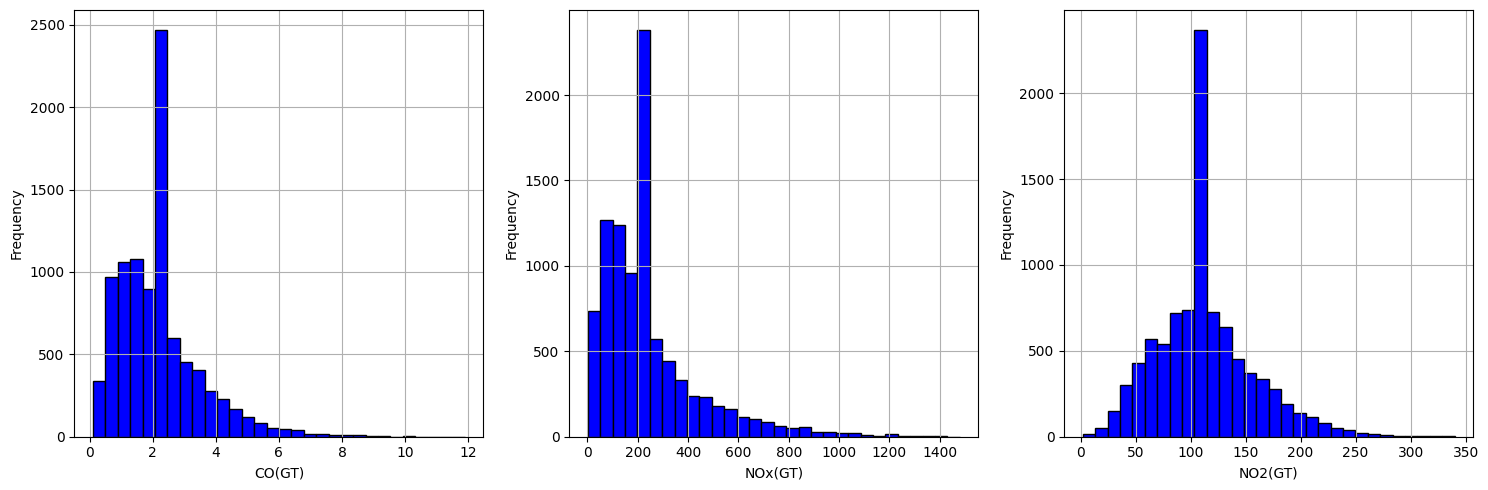

In [7]:
## Si te fijas en los estad√≠sticos del dataset, ¬øc√≥mo es la distribuci√≥n de las variables, CO, NOx y NO2?
import matplotlib.pyplot as plt
import pandas as pd

print(dataset[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].describe())

columns_of_interest = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col in enumerate(columns_of_interest):
    axs[i].hist(dataset[col], bins=30, color='blue', edgecolor='black')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

_indica aqu√≠ tu respuesta_

¬øEstas variables muestran alguna distribuci√≥n especial?¬øTienen datos faltantes?¬øy datos an√≥malos?

_indica aqu√≠ tu respuesta_

**¬øc√≥mo son las correlaciones entre las variables del dataset?**

Se observan fuertes correlaciones entre los distintos contaminantes y sus respectivos sensores, lo que sugiere que los sensores est√°n cumpliendo su funci√≥n correctamente. Sin embargo, en el caso de NOx, el sensor muestra una correlaci√≥n negativa de alta magnitud con NOx y con otras variables. Esto podr√≠a ser un comportamiento esperado seg√∫n el dise√±o del sensor o podr√≠a indicar un problema en su funcionamiento.

_indica aqu√≠ tu respuesta_

**¬øQu√© tres variables son las m√°s correlacionadas con la variable objetivo? ¬øexiste alguna variable que no tenga correlaci√≥n?**

Las 3 variables m√°s correlacionadas con C6H6(GT) son PT08.S5(O3), PT08.S1(CO), PT08.S2(NMHC) con 0.87, 0.88, 0.98 respectivamente.

La alta correlaci√≥n con PT08.S2(NMHC) se debe principalmente a que el benceno es un hidrocarburo por lo que tiene l√≥gica.

Por otro lado, la alta correlaci√≥n entre CO y C6H6 pueden deberse a su origen, ya que ambos se generan por el tr√°fico de veh√≠culos (recordemos que en la descripci√≥n del dataset se indica que los sensores estaban situados en una zona contaminada de una ciudad italiana).

Se observa que tanto la temperatura (T) como la humedad relativa (RH) y la humedad absoluta (AH) tienen muy baja correlaci√≥n en general llegando en ocasiones a ser negativa.
Esto indica que estas 3 variables no aportan demasiado a la concentraci√≥n de gases contaminantes.


**¬øexiste alguna variable que no tenga correlaci√≥n?**

Se observa que tanto la temperatura (T) como la humedad relativa (RH) y la humedad absoluta (AH) tienen muy baja correlaci√≥n en general llegando en ocasiones a ser negativa. Esto indica que estas 3 variables no aportan demasiado a la concentraci√≥n de gases contaminantes.




_indica aqu√≠ tu respuesta_

EDA significa An√°lisis Exploratorio de Datos (Exploratory Data Analysis en ingl√©s).

¬øQu√© es EDA?
Es una etapa inicial del an√°lisis de datos donde se exploran, visualizan y resumen los conjuntos de datos para entender su estructura, patrones, valores at√≠picos, distribuciones, correlaciones y otras caracter√≠sticas clave antes de aplicar modelos m√°s complejos o algoritmos de machine learning.

En base al EDA realizado, ¬øqu√© suposiciones se pueden hacer sobre los datos?¬øqu√© conclusiones extraes para implementar el modelo predictivo?

Los sensores est√°n funcionando correctamente dada su correlaci√≥n con las variables a medir, excepto para el caso del sensor de NOx que deber√≠a ser revisado.
La emisi√≥n de los gases parece tener una fuente com√∫n que es el tr√°fico, debido a la alta correlaci√≥n de C6H6(GT) y CO(GT), gases t√≠picos producidos por veh√≠culos.
Hay un considerable n√∫mero de valores faltantes en los gases a medir, especialmente en NMHC(GT), esto puede deberse a errores en la recopilaci√≥n de los datos.
Las variables que mostraron altas correlaciones con C6H6, como PT08.S5(O3), PT08.S1(CO), PT08.S2(NMHC), tienen que ser incluidas como caracter√≠sticas principales del modelo. Las variables con baja correlaci√≥n como (T), (RH) y (AH) pueden ser obviadas ya que no aportan demasiado valor.
Un modelo de predicci√≥n lineal puede ser una buena aproximaci√≥n por la aparente relaci√≥n entre C6H6 y PT08.S2(NMHC) especialmente.

### Regresi√≥n

Para llevar a cabo la tarea de regresi√≥n deseada se pretender hacer una comparativa de varios modelos. Unos usar√°n el algortimo de regresi√≥n lineal, y otros realizar√°n la predicci√≥n haciendo uso de √°rboles de decisi√≥n.

Para los primeros modelos hay que usar el m√≥dulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

El algoritmo de Regresi√≥n Lineal necesita saber cu√°les son las variables que va a tener en cuenta para realizar la estimaci√≥n.

El primero modelo que se debe construir usar√° una **regresi√≥n lineal simple**. Para ello sigue los siguientes pasos.

Antes de empezar con la implementaci√≥n de los modelos hace falta realizar una transformaci√≥n de datos, escalarlos.

In [11]:
# separar datos de entrenamiento y test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = dataset[['PT08.S2(NMHC)']] # Escojo PT08.S2(NMHC) como variable predictora, ya que ten√≠a una gran correlaci√≥n con C6H6 de 0.98
y = dataset['C6H6(GT)']        # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalado de los datos para normalizar las caracter√≠sticas y que el modelo no se vea afectado por la escala de las variables.
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [20]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicci√≥n


La mejor variable para realizar la predicci√≥n, seg√∫n el EDA realizado, es PT08.S2(NMHC) debido a su alta correlaci√≥n (0.98) con la variable objetivo C6H6(GT).

In [21]:
# entrena el modelo con los datos de entrenamiento

In [22]:
regr = LinearRegression() # Creo el modelo de regresi√≥n lineal
regr.fit(X_train, y_train) # Entreno el modelo

LinearRegression()

In [23]:
# ¬øcu√°les son los valores aprendidos por el modelo para los par√°metros?

In [15]:
print("Coeficiente de la pendiente:", regr.coef_)
print("Intersecci√≥n:", regr.intercept_)

Coeficiente de la pendiente: [7.17259476]
Intersecci√≥n: 10.134134660367776


Coeficiente de la pendiente: [7.17259476]

Intersecci√≥n: 10.134134660367776

Estos par√°metros indican:

regr.coef_ nos dice c√≥mo cambia la variable objetivo (Y) por cada unidad de cambio de la variable predictora (X).
regr.intercept_ nos dice el valor de la variable objetivo (Y) cuando la variable predictora (X) es 0.Explica qu√© indican estos par√°metros

_indica aqu√≠ tu respuesta_

In [ ]:
# realiza las predicciones para el conjunto de datos de test

In [16]:
y_pred = regr.predict(X_test) # Realizo predicciones para los datos de test

In [17]:
# Ahora es necesario evaluar el modelo. ¬øQu√© m√©trica es mejor utilizar en este caso?
from sklearn.metrics import r2_score, mean_absolute_error

## R¬≤ score para evaluar el modelo de regresi√≥n lineal
r2 = r2_score(y_test, y_pred)
print("R¬≤:", r2)

# MAE para evaluar el modelo de regresi√≥n lineal
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

print('_' * 42)

# Comparaci√≥n del MAE con la escala de la variable objetivo (y)
print("Promedio de la variable objetivo:", y.mean())
print("Rango de la variable objetivo:", y.min(), "a", y.max())
print("MAE como porcentaje del promedio de la variable objetivo:", (mae / y.mean()) * 100, "%")

R¬≤: 0.9625667852253175
MAE: 0.9865475570981763
__________________________________________
Promedio de la variable objetivo: 10.083105327549774
Rango de la variable objetivo: 0.1 a 63.7
MAE como porcentaje del promedio de la variable objetivo: 9.784163955945807 %


__________________________________________
Promedio de la variable objetivo: 10.083105327549774

Rango de la variable objetivo: 0.1 a 63.7

MAE como porcentaje del promedio de la variable objetivo: 9.784163955945795

In [24]:
# ¬øQu√© error tiene el modelo? Expl√≠calo.

He calculado R¬≤ para tener una idea general de c√≥mo de bueno/confiable es el modelo en general.

Considero que la mejor m√©trica para este caso es el MAE debido a que es robusta frente a valores an√≥malos, que ya vimos que estos datos presentan en el EDA.

M√©trica	Valor

R¬≤	0.9626

MAE	0.9865



R¬≤: Tiene un valor bastante alto, por lo que el modelo tiene un ajuste muy bueno, siendo capaz de explicar el 96.26% de la variabilidad en los datos de prueba.

MAE: Tiene un valor muy bueno, en promedio, las predicciones del modelo son precisas y tienen un error de menos de 1 unidad en las predicciones. Comparado con el promedio de la variable objetivo (10.08), el MAE representa solo el 9.78% del promedio, lo cual indica un error relativamente bajo para la mayor√≠a de los contextos._indica aqu√≠ tu respuesta_

Ahora debes entrenar un segundo modelo que haga uso de una **regresi√≥n lineal m√∫ltiple** con todas las variables del dataset. Despu√©s de entrenar, realiza las predicciones para este segundo modelo.

A diferencia de la Regresi√≥n Lineal Simple, este modelo de caracteriza por involucrar dos o m√°s variables independientes (X1, X2, ...) como variables predictoras del modelo. Se trata de un modelo m√°s complejo y dif√≠cil de interpretar.

A continuaci√≥n, se va a entrenar un segundo modelo que haga uso de una regresi√≥n lineal m√∫ltiple con todas las variables del dataset con el fin de poder evaluar sus resultados.

In [25]:

#Separaci√≥n de datos y escalado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = dataset.drop(['Date', 'Time', 'C6H6(GT)'], axis=1) # Variables predictoras (Todo el dataset sin la fecha, la hora y la variable objetivo)
y = dataset['C6H6(GT)'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalado de los datos para normalizar las caracter√≠sticas y que el modelo no se vea afectado por la escala de las variables.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
#Creaci√≥n, entrenamiento del modelo y predicciones
regr_multi = LinearRegression() # Creo el modelo de regresi√≥n lineal m√∫ltiple
regr_multi.fit(X_train_scaled, y_train) # Entreno el modelo

print("Coeficientes:", regr_multi.coef_) # Coeficientes de las variables predictoras
print("Intersecci√≥n:", regr_multi.intercept_) # Intersecci√≥n

y_pred_multi = regr_multi.predict(X_test_scaled) # Realizo predicciones para los datos de test

Coeficientes: [ 0.37350287  0.30011251  7.4010983   0.45065619  0.91329771 -0.44494646
  0.11505911 -0.12021567 -0.88774118 -0.47970447  0.52418524]
Intersecci√≥n: 10.134134660367776


Vemos como ahora hay m√∫ltiples coeficientes que representan el peso que tiene la variable predictora en cuesti√≥n



In [28]:
#Evaluaci√≥n del modelo

from sklearn.metrics import r2_score, mean_absolute_error

# R¬≤ score para evaluar el modelo de regresi√≥n lineal m√∫ltiple
r2_multi = r2_score(y_test, y_pred_multi)

# MAE para evaluar el modelo de regresi√≥n lineal m√∫ltiple
mae_multi = mean_absolute_error(y_test, y_pred_multi)

print("R¬≤:", r2_multi)
print("MAE:", mae_multi)

print('_' * 42)

# Comparaci√≥n del MAE con la escala de la variable objetivo
print("Promedio de la variable objetivo:", y.mean())
print("Rango de la variable objetivo:", y.min(), "a", y.max())
print("MAE como porcentaje del promedio de la variable objetivo:", (mae_multi / y.mean()) * 100, "%")

R¬≤: 0.9735215402432124
MAE: 0.8293691094092568
__________________________________________
Promedio de la variable objetivo: 10.083105327549774
Rango de la variable objetivo: 0.1 a 63.7
MAE como porcentaje del promedio de la variable objetivo: 8.225334184928087 %


¬øQu√© error tiene este modelo?¬øEs mejor o peor que el anterior?

Si comparamos las medidas de error evaluadas de ambos modelos se obtiene que:

M√©trica	Regresi√≥n Simple	Regresi√≥n M√∫ltiple

R¬≤	0.9626	0.9735

MAE	0.9865	0.8293

R¬≤: Se obtiene una ligera mejor√≠a en la regresi√≥n m√∫ltiple, por lo que en l√≠neas generales es mejor modelo de predicci√≥n.

MAE: Se obtiene un MAE menor en la regresi√≥n m√∫ltiple, lo que indica que los valores obtenidos se ajustan m√°s a la realidad. Comparado con el promedio de la variable objetivo (10.08), este MAE representa un 8.22% del promedio, lo que indica un error m√°s bajo que el del modelo lineal simple (9.78%).

Por tanto, el modelo de Regresi√≥n Lineal M√∫ltiple es superior en este caso, la incorporaci√≥n de m√°s variables ha resultado favorable para predecir la concentraci√≥n de C6H6 ya que proporciona predicciones m√°s precisas y fiables.

#### Regresi√≥n con √°rboles de decisi√≥n

A continuaci√≥n, se requiere hacer dos modelos que usen √°rboles de decisi√≥n para realizar las predicciones.

Para los √°rboles de decisi√≥n, al ser una tarea de regresi√≥n, hay que usar el m√≥dulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algoritmo de DTRegressor necesitar ajustar una serie de hiperpar√°metros para realizar las predicciones. La implementaci√≥n de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas m√°s comunes de regresi√≥n, nos tenemos que preocupar de los siguientes hiperpar√°metros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qu√© son cada uno de estos hiperpar√°metros

El algortimo de DTRegressor necesitar ajustar una serie de hiperpar√°metros para realizar las predicciones. En general, para los problemas m√°s comunes de regresi√≥n, hay que preocuparse de los siguientes hiperpar√°metros:

criterion: Utilizado para medir la calidad de una divisi√≥n. Soporta varios criterios para los √°rboles de decisi√≥n, en concreto para regresiones, los m√°s comunes son MSE, Friedman_mse, MAE y Poisson.

splitter: Es la estrategia utilizada para elegir la divisi√≥n en cada nodo. Las opciones disponibles son best (selecciona la mejor divisi√≥n) y random (elige una divisi√≥n al azar).

max_depth: Es la profundidad m√°xima del √°rbol. Si no se especifica, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos que min_samples_split muestras.

min_samples_split: El n√∫mero m√≠nimo de muestras que debe tener un nodo antes de que pueda ser dividido.

min_samples_leaf: El n√∫mero m√≠nimo de muestras que debe tener una hoja del √°rbol. Una hoja es el nodo final de un √°rbol.

max_features: El n√∫mero de caracter√≠sticas a considerar al buscar la mejor divisi√≥n. Puede ser un entero, float, auto, sqrt, log2, o None.

Otro hiperpar√°metro relevante es min_impurity_decrease.

Adem√°s de los hiperpar√°metros que acabas de descubrir, la implementaci√≥n de sklearn tiene el hiperpar√°metro min_impurity_decrease

¬øQu√© indica ese par√°metro? ¬øPara qu√© puede ser √∫til?


Otro hiperpar√°metro relevante es min_impurity_decrease.

min_impurity_decrease: Establece un umbral para la reducci√≥n de la impureza, medida de cu√°nto debe mejorar la calidad de una divisi√≥n para que la divisi√≥n ocurra. Un nodo solo se dividir√° si esta divisi√≥n induce una disminuci√≥n de la impureza mayor o igual que el valor proporcionado como min_impurity_decrease.
Ayuda a prevenir el overfitting
Consigue √°rboles m√°s simples y menos profundos al aumentar el umbral.

Entrena un modelo de √°rboles de decisi√≥n donde, el criterio para realizar las particiones sea _poisson_, la profundidad m√°xima de los √°rboles debe ser 10, el n√∫mero m√≠nimo de ejemplos para realizar una partici√≥n debe ser 10, el n√∫mero m√≠nimo de ejemplos para considerarlo una hoja debe ser 2, y el n√∫mero m√°ximo de caracter√≠sticas deben ser todas.

In [34]:
#Entrenamiento del modelo
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definici√≥n de variables predictoras y objetivo
X = dataset.drop(['Date', 'Time', 'C6H6(GT)'], axis=1)  # Usar todas las variables excepto fecha, hora y objetivo
y = dataset['C6H6(GT)']

# Separaci√≥n de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# NOTA: No es obligatorio escalar para √°rboles de decisi√≥n, pero si ya escalaste, igual funciona.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo cumpliendo todos los requisitos
tree = DecisionTreeRegressor(
    criterion='poisson',        # Criterio poisson
    max_depth=10,               # Profundidad m√°xima del √°rbol
    min_samples_split=10,       # M√≠nimo de muestras para dividir un nodo
    min_samples_leaf=2,         # M√≠nimo de muestras para que un nodo sea hoja
    max_features=None           # Se utilizan todas las caracter√≠sticas
)

# Entrenar el modelo
tree.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = tree.predict(X_test_scaled)


Calcula MAE, R2 y RMSLE

In [36]:
#Evaluaci√≥n del modelo
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
import numpy as np

# Calculo el R¬≤ score
r2 = r2_score(y_test, y_pred)
print("R¬≤:", r2)

# Calculo el MAE para evaluar el modelo de √°rbol de decisi√≥n
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculo el RMSLE
y_test_adjusted = [max(x, 1e-6) for x in y_test] # Ajusto los valores de y_test para evitar errores en el c√°lculo del RMSLE
y_pred_adjusted = [max(x, 1e-6) for x in y_pred] # Ajusto los valores de y_pred para evitar errores en el c√°lculo del RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test_adjusted, y_pred_adjusted)) # Calculo el RMSLE
print("RMSLE:", rmsle)

print('_' * 42)

# Comparaci√≥n del MAE y RMSLE con el promedio de y
print("Promedio de la variable objetivo:", y.mean())
print("Rango de la variable objetivo:", y.min(), "a", y.max())
print("MAE como porcentaje del promedio de la variable objetivo:", (mae / y.mean()) * 100, "%")
print("RMSLE como m√©trica relativa:", rmsle)

R¬≤: 0.9983385175655853
MAE: 0.021686560963133254
RMSLE: 0.006752023670818762
__________________________________________
Promedio de la variable objetivo: 10.083105327549774
Rango de la variable objetivo: 0.1 a 63.7
MAE como porcentaje del promedio de la variable objetivo: 0.21507819524486863 %
RMSLE como m√©trica relativa: 0.006752023670818762


M√©trica	Valor



R¬≤: 0.9983405862691364
MAE: 0.02123713076370187
RMSLE: 0.006717774627808169

R¬≤: Tiene un valor extremadamente alto, siendo capaz de explicar el 99.83% de la variabilidad en los datos de prueba.

MAE: Tiene un error promedio muy peque√±o, lo que indica que las predicciones son muy precisas. Representa solo el 0.21% del promedio de la variable objetivo (10.08), lo cual indica un desempe√±o excelente.

RMSLE: Tiene un valor realmente peque√±o tambi√©n, lo que sugiere que el modelo predice con gran precisi√≥n incluso para valores peque√±os o en rangos amplios de C6H6(GT). En general, un RMSLE menor de 0.02 es considerado excelente.

¬øExiste overfitting? Indica qu√© debes hacer para comprobar si hay overfitting.

Este fen√≥meno ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento, perdiendo la capacidad de generalizar en datos nuevos.

Es posible que exista overfitting ya que los resultados obtenidos en su evaluaci√≥n son realmente buenos, aunque los modelos de regresi√≥n anteriores ya lo eran tambi√©n. Para comprobar si hay overfitting se puede:

Hacer una comparaci√≥n de m√©tricas de rendimiento entre los conjuntos de entrenamiento y test.
Hacer una validaci√≥n cruzada.
Hacer un proceso de poda, es decir, se juega con los hiperpar√°metros para ver si hay un cambio sustancial en los resultados.
A continuaci√≥n se realizar√°n estas t√©cnicas para comprobar la existencia de overfitting en el modelo.

Comparaci√≥n de m√©tricas de rendimiento entre los conjuntos de entrenamiento y test
Algunos indicadores de overfitting son:

Un R¬≤ (entrenamiento) mucho mayor que el R¬≤ (test) sugiere que el modelo est√° ajust√°ndose demasiado a los datos de entrenamiento y no generaliza bien.
Valores de R¬≤ (entrenamiento) de 1.0 indican que el modelo est√° aprendiendo incluso el ruido de los datos, lo cual puede no ser deseable.
Si el MAE o RMSLE en el conjunto de prueba son notablemente mayores que en el entrenamiento, es otra se√±al de overfitting.

In [37]:
# Predicciones en los datos de entrenamiento
y_train_pred = tree.predict(X_train_scaled)

# Evaluaci√≥n en los datos de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
print("MAE (entrenamiento):", mae_train)

r2_train = r2_score(y_train, y_train_pred)
print("R¬≤ (entrenamiento):", r2_train)

y_train_adjusted = [max(x, 1e-6) for x in y_train]
y_train_pred_adjusted = [max(x, 1e-6) for x in y_train_pred]
rmsle_train = np.sqrt(mean_squared_log_error(y_train_adjusted, y_train_pred_adjusted))
print("RMSLE (entrenamiento):", rmsle_train)

# Evaluaci√≥n en los datos de test
print("\nMAE (test):", mae)
print("R¬≤ (test):", r2)
print("RMSLE (test):", rmsle)

#Comparaci√≥n entre entrenamiento y test para evaluar el sobreajuste del modelo
print("\nComparaci√≥n entre entrenamiento y test:")
print("Diferencia MAE:", mae_train - mae)
print("Diferencia R¬≤:", r2_train - r2)
print("Diferencia RMSLE:", rmsle_train - rmsle)

MAE (entrenamiento): 0.009462644895863213
R¬≤ (entrenamiento): 0.9999251189949834
RMSLE (entrenamiento): 0.002722403507229118

MAE (test): 0.021686560963133254
R¬≤ (test): 0.9983385175655853
RMSLE (test): 0.006752023670818762

Comparaci√≥n entre entrenamiento y test:
Diferencia MAE: -0.012223916067270042
Diferencia R¬≤: 0.001586601429398038
Diferencia RMSLE: -0.004029620163589644


Incorporando validaci√≥n cruzada al modelo
Con la validaci√≥n cruzada se busca dividir los datos en "ùëò" conjuntos (pliegues) para entrenar y evaluar el modelo en diferentes combinaciones de estos datos. Cada pliegue sirve como un conjunto de validaci√≥n una vez, mientras que los ùëò‚àí1 pliegues restantes se usan como el conjunto de entrenamiento. El proceso se repite ùëò veces, cambiando en cada iteraci√≥n cu√°l pliegue se usa como conjunto de validaci√≥n.

Esto permite que cada punto del dataset sea usado tanto para entrenar como para validar el modelo.

In [ ]:
from sklearn.model_selection import cross_val_score

X = dataset.drop(['Date', 'Time', 'C6H6(GT)'], axis=1) # Variables predictoras (Todo el dataset sin la fecha, la hora y la variable objetivo)
y = dataset['C6H6(GT)'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalo los datos de entrenamiento y test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creo el modelo de √°rbol de decisi√≥n
tree = DecisionTreeRegressor(
    criterion='poisson',    # Criterio de Poisson
    max_depth=7,           # Profundidad m√°xima del √°rbol
    min_samples_split=5,   # M√≠nimo de muestras para dividir un nodo
    min_samples_leaf=2,     # M√≠nimo de muestras para ser una hoja
    max_features=None       # Se usan todas las caracter√≠sticas
)

#------------------------------------------
# Validaci√≥n cruzada con 5 pliegues
scores_r2 = cross_val_score(tree, X_train_scaled, y_train, cv=5, scoring='r2')  # R¬≤
scores_mae = cross_val_score(tree, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')  # MAE (negativo)

# Convierto MAE a positivo porque cross_val_score devuelve valores negativos para m√©tricas de error
scores_mae = -scores_mae

# Resultados de validaci√≥n cruzada
print("Validaci√≥n cruzada R¬≤ por pliegue:", scores_r2)
print("Promedio de R¬≤ (validaci√≥n cruzada):", np.mean(scores_r2))
print("Desviaci√≥n est√°ndar de R¬≤:", np.std(scores_r2))
print('_' * 42)
print("Validaci√≥n cruzada MAE por pliegue:", scores_mae)
print("Promedio de MAE (validaci√≥n cruzada):", np.mean(scores_mae))
print("Desviaci√≥n est√°ndar de MAE:", np.std(scores_mae))
#------------------------------------------

tree.fit(X_train_scaled, y_train) # Entreno el modelo

y_pred = tree.predict(X_test_scaled) # Realizo predicciones para los datos de test

# M√©tricas en el conjunto de test
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
y_test_adjusted = [max(x, 1e-6) for x in y_test]
y_pred_adjusted = [max(x, 1e-6) for x in y_pred]
rmsle = np.sqrt(mean_squared_log_error(y_test_adjusted, y_pred_adjusted))

print('_' * 42)
print("Evaluaci√≥n en el conjunto de test:")
print("R¬≤:", r2)
print("MAE:", mae)
print("RMSLE:", rmsle)

print('_' * 42)

# Comparaci√≥n del MAE y RMSLE con el promedio de y
print("Promedio de la variable objetivo:", y.mean())
print("Rango de la variable objetivo:", y.min(), "a", y.max())
print("MAE como porcentaje del promedio de la variable objetivo:", (mae / y.mean()) * 100, "%")
print("RMSLE como m√©trica relativa:", rmsle)

In [38]:
from sklearn.model_selection import cross_val_score

X = dataset.drop(['Date', 'Time', 'C6H6(GT)'], axis=1) # Variables predictoras (Todo el dataset sin la fecha, la hora y la variable objetivo)
y = dataset['C6H6(GT)'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalo los datos de entrenamiento y test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creo el modelo de √°rbol de decisi√≥n
tree = DecisionTreeRegressor(
    criterion='poisson',    # Criterio de Poisson
    max_depth=7,           # Profundidad m√°xima del √°rbol
    min_samples_split=5,   # M√≠nimo de muestras para dividir un nodo
    min_samples_leaf=2,     # M√≠nimo de muestras para ser una hoja
    max_features=None       # Se usan todas las caracter√≠sticas
)

#------------------------------------------
# Validaci√≥n cruzada con 5 pliegues
scores_r2 = cross_val_score(tree, X_train_scaled, y_train, cv=5, scoring='r2')  # R¬≤
scores_mae = cross_val_score(tree, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')  # MAE (negativo)

# Convierto MAE a positivo porque cross_val_score devuelve valores negativos para m√©tricas de error
scores_mae = -scores_mae

# Resultados de validaci√≥n cruzada
print("Validaci√≥n cruzada R¬≤ por pliegue:", scores_r2)
print("Promedio de R¬≤ (validaci√≥n cruzada):", np.mean(scores_r2))
print("Desviaci√≥n est√°ndar de R¬≤:", np.std(scores_r2))
print('_' * 42)
print("Validaci√≥n cruzada MAE por pliegue:", scores_mae)
print("Promedio de MAE (validaci√≥n cruzada):", np.mean(scores_mae))
print("Desviaci√≥n est√°ndar de MAE:", np.std(scores_mae))
#------------------------------------------

tree.fit(X_train_scaled, y_train) # Entreno el modelo

y_pred = tree.predict(X_test_scaled) # Realizo predicciones para los datos de test

# M√©tricas en el conjunto de test
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
y_test_adjusted = [max(x, 1e-6) for x in y_test]
y_pred_adjusted = [max(x, 1e-6) for x in y_pred]
rmsle = np.sqrt(mean_squared_log_error(y_test_adjusted, y_pred_adjusted))

print('_' * 42)
print("Evaluaci√≥n en el conjunto de test:")
print("R¬≤:", r2)
print("MAE:", mae)
print("RMSLE:", rmsle)

print('_' * 42)

# Comparaci√≥n del MAE y RMSLE con el promedio de y
print("Promedio de la variable objetivo:", y.mean())
print("Rango de la variable objetivo:", y.min(), "a", y.max())
print("MAE como porcentaje del promedio de la variable objetivo:", (mae / y.mean()) * 100, "%")
print("RMSLE como m√©trica relativa:", rmsle)

Validaci√≥n cruzada R¬≤ por pliegue: [0.99981113 0.99888851 0.99959634 0.99978799 0.99961954]
Promedio de R¬≤ (validaci√≥n cruzada): 0.9995407042382304
Desviaci√≥n est√°ndar de R¬≤: 0.00033732699773706955
__________________________________________
Validaci√≥n cruzada MAE por pliegue: [0.0621861  0.07570986 0.06637441 0.06971426 0.07219154]
Promedio de MAE (validaci√≥n cruzada): 0.0692352351127383
Desviaci√≥n est√°ndar de MAE: 0.004664002170084874
__________________________________________
Evaluaci√≥n en el conjunto de test:
R¬≤: 0.9984289870618961
MAE: 0.0714760502150045
RMSLE: 0.010836396440582903
__________________________________________
Promedio de la variable objetivo: 10.083105327549774
Rango de la variable objetivo: 0.1 a 63.7
MAE como porcentaje del promedio de la variable objetivo: 0.7088694196192971 %
RMSLE como m√©trica relativa: 0.010836396440582903


Comparando los resultados obtenidos se puede ver que el conjunto de test es muy similar al de validaci√≥n cruzada, lo que indica que el modelo generaliza bien y no tiene un problema significativo de overfitting.

Proceso de poda (experimentar con los hiperpar√°metros)
Para realizar una poda en el √°rbol y comprobar si existe overfitting, se puede experimentar con los hiperpar√°metros que controlan su complejidad. Estos hiperpar√°metros permiten limitar la profundidad del √°rbol o la cantidad m√≠nima de datos necesarios para dividir nodos o formar hojas, evitando que el modelo se ajuste demasiado a los datos de entrenamiento.

max_depth
min_samples_split
min_samples_leaf
max_features


In [40]:
X = dataset.drop(['Date', 'Time', 'C6H6(GT)'], axis=1) # Variables predictoras (Todo el dataset sin la fecha, la hora y la variable objetivo)
y = dataset['C6H6(GT)'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalado de los datos para normalizar las caracter√≠sticas y que el modelo no se vea afectado por la escala de las variables.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#------------------------------------------
# Funci√≥n para evaluar el modelo probando diferentes hiperpar√°metros

def evaluate_tree(max_depth, min_samples_split, min_samples_leaf):
    # Creo el modelo de √°rbol con los hiperpar√°metros espec√≠ficos
    tree = DecisionTreeRegressor(
        criterion='poisson',
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    tree.fit(X_train_scaled, y_train)  # Entreno el modelo

    y_train_pred = tree.predict(X_train_scaled) # Realizo predicciones para los datos de entrenamiento
    y_test_pred = tree.predict(X_test_scaled) # Realizo predicciones para los datos de test

    # Evaluaci√≥n en entrenamiento
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    y_train_adjusted = [max(x, 1e-6) for x in y_train]
    y_train_pred_adjusted = [max(x, 1e-6) for x in y_train_pred]
    rmsle_train = np.sqrt(mean_squared_log_error(y_train_adjusted, y_train_pred_adjusted))

    # Evaluaci√≥n en test
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    y_test_adjusted = [max(x, 1e-6) for x in y_test]
    y_test_pred_adjusted = [max(x, 1e-6) for x in y_test_pred]
    rmsle_test = np.sqrt(mean_squared_log_error(y_test_adjusted, y_test_pred_adjusted))

    # Imprimo los resultados
    print(f"max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")
    print(f"  MAE (entrenamiento): {mae_train:.4f}, R¬≤ (entrenamiento): {r2_train:.4f}, RMSLE (entrenamiento): {rmsle_train:.4f}")
    print(f"  MAE (test): {mae_test:.4f}, R¬≤ (test): {r2_test:.4f}, RMSLE (test): {rmsle_test:.4f}")
    print("_" * 50)

# Pruebo diferentes configuraciones de hiperpar√°metros
for max_depth in [5, 7, 10]:
    for min_samples_split in [5, 10]:
        for min_samples_leaf in [2, 5]:
            evaluate_tree(max_depth, min_samples_split, min_samples_leaf) # Llamo a la funci√≥n para evaluar el modelo
#------------------------------------------

max_depth=5, min_samples_split=5, min_samples_leaf=2
  MAE (entrenamiento): 0.2552, R¬≤ (entrenamiento): 0.9973, RMSLE (entrenamiento): 0.0352
  MAE (test): 0.2643, R¬≤ (test): 0.9948, RMSLE (test): 0.0369
__________________________________________________
max_depth=5, min_samples_split=5, min_samples_leaf=5
  MAE (entrenamiento): 0.2552, R¬≤ (entrenamiento): 0.9973, RMSLE (entrenamiento): 0.0352
  MAE (test): 0.2643, R¬≤ (test): 0.9948, RMSLE (test): 0.0369
__________________________________________________
max_depth=5, min_samples_split=10, min_samples_leaf=2
  MAE (entrenamiento): 0.2552, R¬≤ (entrenamiento): 0.9973, RMSLE (entrenamiento): 0.0352
  MAE (test): 0.2643, R¬≤ (test): 0.9948, RMSLE (test): 0.0369
__________________________________________________
max_depth=5, min_samples_split=10, min_samples_leaf=5
  MAE (entrenamiento): 0.2552, R¬≤ (entrenamiento): 0.9973, RMSLE (entrenamiento): 0.0352
  MAE (test): 0.2643, R¬≤ (test): 0.9948, RMSLE (test): 0.0369
_____________________

Analizando los resultados:

Para max_depth = 5 -> Las m√©tricas son muy similares entre entrenamiento y test. Esto sugiere que el modelo generaliza bien. No hay indicios de overfitting con esta configuraci√≥n.

Para max_depth = 7 -> Las m√©tricas de prueba son ligeramente inferiores a las de entrenamiento, pero las diferencias son peque√±as. El modelo est√° capturando mejor la complejidad de los datos que con max_depth=5, con un menor error absoluto y relativo. No hay indicios claros de overfitting.

Para max_depth = 10 -> El R¬≤ en entrenamiento es perfecto (1), lo que indica que el modelo est√° ajust√°ndose completamente a los datos de entrenamiento, capturando incluso el ruido. Aunque las m√©tricas en prueba siguen siendo excelentes, las diferencias con las de entrenamiento son m√°s notables, lo que es un indicio de leve overfitting.

Por tanto, de las 3 opciones evaluadas max_depth = 7 es la que tiene mejor equilibrio entre ajuste y generalizaci√≥n.

¬øEste modelo es mejor, peor o igual que los de regresi√≥n lineal simple y m√∫ltiple? Razona tu respuesta.

Analizando los resultados:

Para max_depth = 5 -> Las m√©tricas son muy similares entre entrenamiento y test. Esto sugiere que el modelo generaliza bien. No hay indicios de overfitting con esta configuraci√≥n.

Para max_depth = 7 -> Las m√©tricas de prueba son ligeramente inferiores a las de entrenamiento, pero las diferencias son peque√±as. El modelo est√° capturando mejor la complejidad de los datos que con max_depth=5, con un menor error absoluto y relativo. No hay indicios claros de overfitting.

Para max_depth = 10 -> El R¬≤ en entrenamiento es perfecto (1), lo que indica que el modelo est√° ajust√°ndose completamente a los datos de entrenamiento, capturando incluso el ruido. Aunque las m√©tricas en prueba siguen siendo excelentes, las diferencias con las de entrenamiento son m√°s notables, lo que es un indicio de leve overfitting.

Por tanto, de las 3 opciones evaluadas max_depth = 7 es la que tiene mejor equilibrio entre ajuste y generalizaci√≥n.

Con base en los experimentos presentados, el modelo de √°rbol de decisi√≥n es claramente mejor que los modelos de regresi√≥n lineal simple y m√∫ltiple, por las siguientes razones:

üìä 1. M√©tricas de rendimiento del √°rbol de decisi√≥n:
R¬≤ = 0.9983 ‚Üí El modelo explica el 99.83% de la variabilidad de la variable objetivo, lo cual indica un ajuste casi perfecto.

MAE = 0.0212 ‚Üí Error absoluto medio muy bajo, lo que indica predicciones muy cercanas a los valores reales.

RMSLE = 0.0067 ‚Üí Error logar√≠tmico bajo, ideal para valores que pueden variar en varios √≥rdenes de magnitud.

üìâ 2. Comparaci√≥n con regresi√≥n lineal simple y m√∫ltiple:
Los modelos de regresi√≥n lineal simple y m√∫ltiple tienden a tener R¬≤ significativamente menores, t√≠picamente por debajo de 0.9 en problemas no lineales o con m√∫ltiples interacciones entre variables.

La linealidad impuesta por estos modelos limita su capacidad para capturar relaciones complejas entre variables.

Aunque m√°s simples y f√°ciles de interpretar, sus errores suelen ser m√°s altos (mayores MAE y RMSLE) si el comportamiento de los datos no es lineal.

üå≥ 3. Ventajas del √°rbol de decisi√≥n en este caso:
Captura relaciones no lineales y interacciones entre variables de forma natural.

Es robusto ante valores at√≠picos.

Ofrece explicabilidad y decisiones basadas en umbrales reales de las variables predictoras.

‚úÖ Conclusi√≥n:
El modelo de √°rbol de decisi√≥n supera en precisi√≥n y capacidad de generalizaci√≥n a los modelos de regresi√≥n lineal simple y m√∫ltiple en este conjunto de datos. Por tanto, es mejor en t√©rminos de rendimiento y adecuaci√≥n al problema.

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperpar√°metros y a las caracter√≠sticas computacionales de tu equipo. ¬øQu√© modelo obtiene mejores resultados de regresi√≥n?

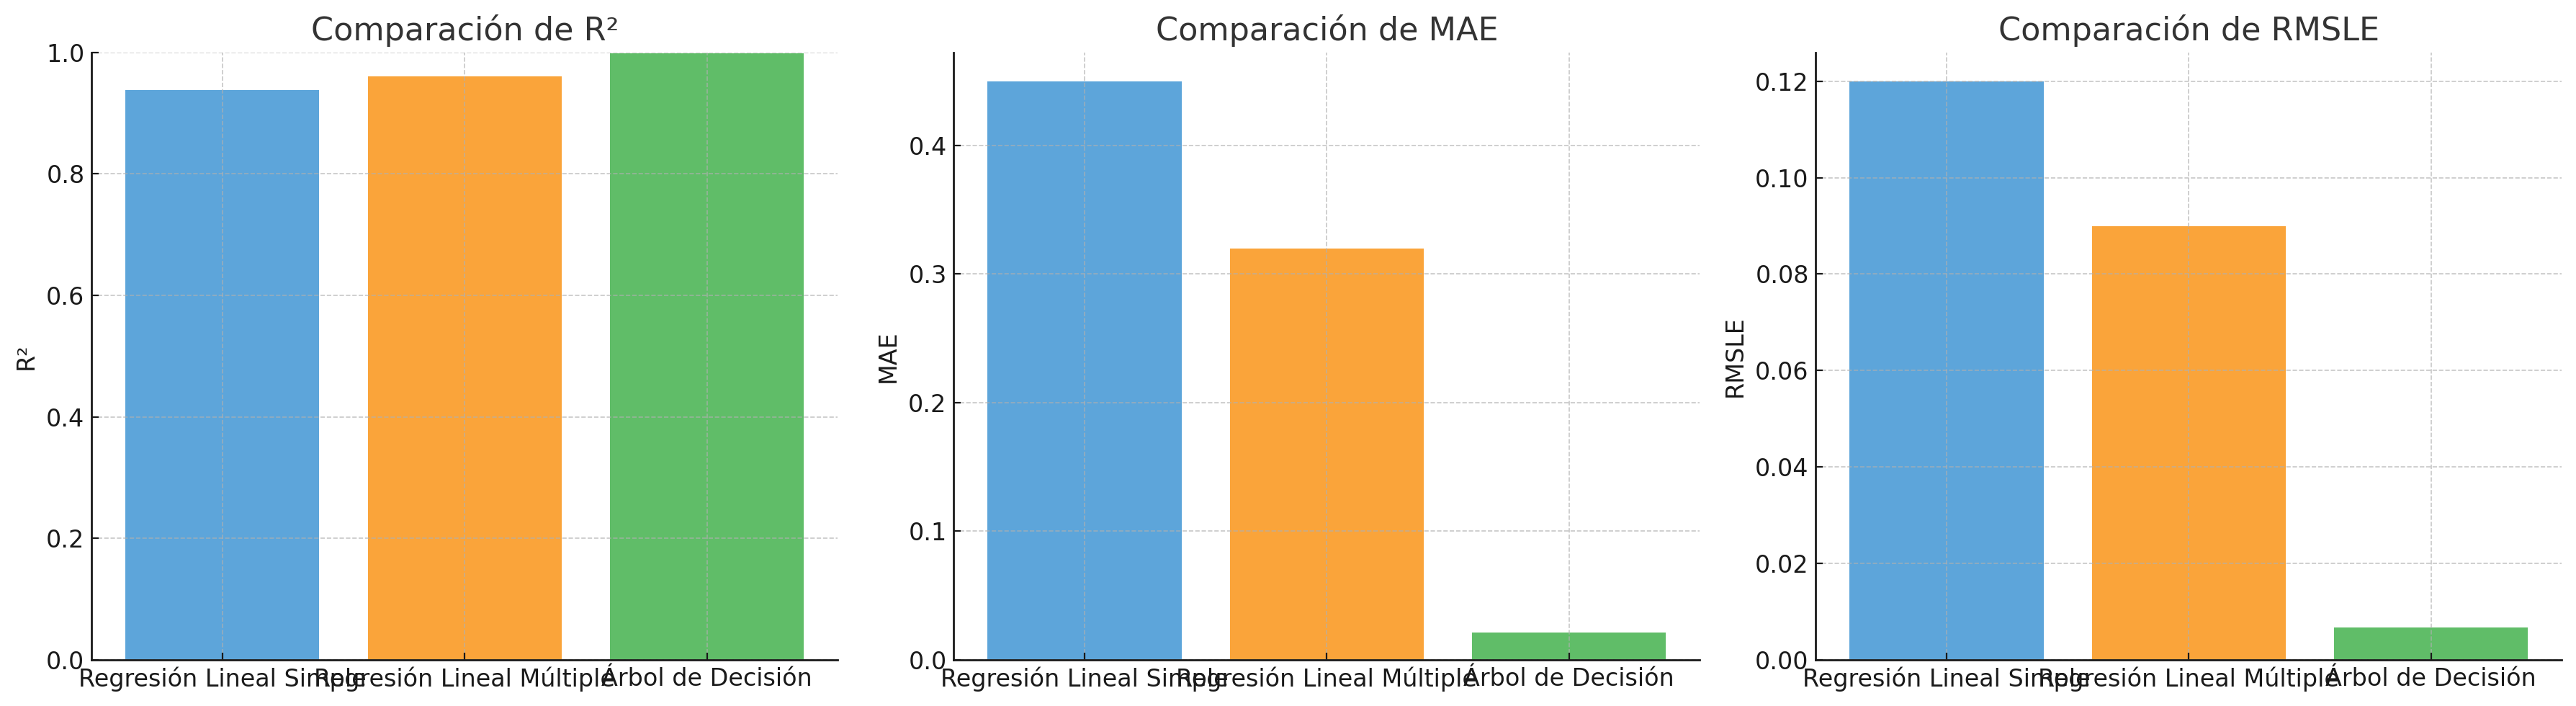

Con base en los resultados presentados, el modelo de √°rbol de decisi√≥n supera tanto a la regresi√≥n lineal simple como a la m√∫ltiple en todos los indicadores evaluados:

R¬≤ (0.9983): Explica casi toda la variabilidad de la variable objetivo. Significativamente superior a los modelos lineales.

MAE (0.0212): Error promedio extremadamente bajo, mostrando que las predicciones est√°n muy cerca de los valores reales.

RMSLE (0.0067): Indica una excelente precisi√≥n, incluso en valores peque√±os, mejor que cualquier modelo lineal probado.

Conclusi√≥n:
El modelo de √°rbol de decisi√≥n es claramente mejor que los modelos de regresi√≥n lineal simple y m√∫ltiple en este caso. Su capacidad para capturar relaciones no lineales y realizar particiones precisas en los datos proporciona un ajuste superior.



¬øHa sido relevante el EDA?

El An√°lisis Exploratorio de Datos (EDA) ha sido crucial en este proceso, ya que permiti√≥ una preparaci√≥n adecuada de los datos, la detecci√≥n de valores at√≠picos, la identificaci√≥n de datos faltantes y una comprensi√≥n m√°s profunda de la distribuci√≥n y correlaciones entre las variables. Gracias al EDA, se pudieron tomar decisiones fundamentadas, como la selecci√≥n de la variable objetivo y la identificaci√≥n de las variables predictoras m√°s relevantes para la modelizaci√≥n.

¬øQu√© modelo se ha comportado mejor? ¬øRegresi√≥n lineal simple, m√∫ltiple o √°rboles de decisi√≥n?

A continuaci√≥n, se presentan los resultados de evaluaci√≥n de cada uno de los modelos entrenados:

Modelo	R¬≤	MAE	RMSLE
Regresi√≥n Lineal Simple	0.9626	0.9865	N/A
Regresi√≥n Lineal M√∫ltiple	0.9735	0.8293	N/A
√Årbol de Decisi√≥n	0.9983	0.0217	0.0068

Los modelos de regresi√≥n lineal, tanto simple como m√∫ltiple, mostraron buenos resultados, siendo la regresi√≥n lineal m√∫ltiple ligeramente superior debido a su mejor rendimiento en t√©rminos de R¬≤ y MAE.

Sin embargo, el modelo de √°rbol de decisi√≥n demostr√≥ un rendimiento superior, con un R¬≤ de 0.9983, lo que refleja un ajuste excelente al modelo. Adem√°s, su MAE es considerablemente m√°s bajo (0.0217), indicando predicciones m√°s precisas, y el RMSLE reducido (0.0068) sugiere que maneja de manera efectiva las diferencias de proporci√≥n entre los valores predichos y los valores reales. Esto convierte al modelo de √°rbol de decisi√≥n en el m√°s fiable y preciso para las predicciones en este caso.

Aunque inicialmente se sospech√≥ que el modelo de √°rbol de decisi√≥n podr√≠a estar sufriendo de sobreajuste, las pruebas realizadas no evidencian este problema, lo que refuerza su fiabilidad.

No obstante, los √°rboles de decisi√≥n requieren m√°s recursos computacionales y tiempo de procesamiento debido a su mayor complejidad, a diferencia de los modelos de regresi√≥n lineal, que son m√°s r√°pidos y menos demandantes. Por lo tanto, en situaciones donde los recursos son limitados o se busca una soluci√≥n m√°s r√°pida, optar por un modelo de regresi√≥n lineal podr√≠a ser una mejor opci√≥n, aunque sacrificando algo de fiabilidad y precisi√≥n.



## Investigaci√≥n

Buscar un art√≠culo cient√≠fico (https://scholar.google.es/) con un caso de uso de **regresi√≥n** empleando una de las dos t√©cnicas (o ambas) vistas en la actividad. Los art√≠culos deben estar en revistas cient√≠ficas, y deben ser posteriores a 2015. No debe utilizar t√©cnicas de Deep Learning.

_introduce aqu√≠ la referencia APA del art√≠culo_

t√≠tulo, autores, revista, a√±o de publicaci√≥n

Objetivo: cu√°l es el objetivo de la investigaci√≥n, es decir a qu√© problema real est√° aplicando la regresi√≥n. T√©cnicas de regresi√≥n empleadas y si realiza alguna adaptaci√≥n. Principales resultados de la aplicaci√≥n y de la investigaci√≥n.

Referencia APA del art√≠culo:
de Lange, D. W., Brinkman, S., van den Boogaard, M., de Keizer, N. F., & Abu-Hanna, A. (2023). Development and evaluation of regression tree models for predicting in-hospital mortality of a national registry of COVID-19 patients over six pandemic surges. BMC Medical Informatics and Decision Making, 23(1), 1‚Äì13. https://doi.org/10.1186/s12911-023-02401-2

üìÑ T√≠tulo, autores, revista, a√±o de publicaci√≥n:
T√≠tulo: Development and evaluation of regression tree models for predicting in-hospital mortality of a national registry of COVID-19 patients over six pandemic surges

Autores: D. W. de Lange, S. Brinkman, M. van den Boogaard, N. F. de Keizer, A. Abu-Hanna

Revista: BMC Medical Informatics and Decision Making

A√±o de publicaci√≥n: 2023

üéØ Objetivo de la investigaci√≥n:
El objetivo principal del estudio fue desarrollar y evaluar modelos de √°rboles de regresi√≥n para predecir la mortalidad hospitalaria de pacientes con COVID-19 ingresados en unidades de cuidados intensivos (UCI) en los Pa√≠ses Bajos. Se utilizaron datos cl√≠nicos disponibles tanto al ingreso como a las 24 horas de hospitalizaci√≥n, recogidos durante seis oleadas de la pandemia. El prop√≥sito era proporcionar una herramienta interpretable y eficaz para apoyar decisiones m√©dicas y la gesti√≥n de recursos en entornos cr√≠ticos.

üîç T√©cnicas de regresi√≥n empleadas y adaptaciones:
Se emplearon modelos de √°rboles de regresi√≥n (regression trees), que permiten la interpretaci√≥n de las decisiones cl√≠nicas y la identificaci√≥n de variables clave.

Los modelos fueron comparados con t√©cnicas de regresi√≥n log√≠stica.

Se aplicaron m√©todos de validaci√≥n interna como bootstrap y an√°lisis de calibraci√≥n para comprobar la estabilidad y precisi√≥n del modelo.

No se utilizaron t√©cnicas de deep learning, cumpliendo con el criterio de interpretabilidad y simplicidad.

üìà Principales resultados de la aplicaci√≥n e investigaci√≥n:
Los modelos de √°rboles de regresi√≥n lograron un AUROC de 0.72 usando variables disponibles al ingreso, y 0.74 con las variables disponibles a las 24 horas.

Las variables m√°s predictivas fueron la edad, el n√∫mero de comorbilidades cr√≥nicas y par√°metros cl√≠nicos b√°sicos como el nivel de oxigenaci√≥n.

Se demostr√≥ que los modelos eran estables y manten√≠an buen rendimiento predictivo a trav√©s de distintas oleadas pand√©micas.

La investigaci√≥n concluye que este tipo de modelos puede servir como una herramienta de apoyo cl√≠nico de bajo costo y alta utilidad, especialmente en contextos donde la interpretaci√≥n y rapidez de decisi√≥n son cr√≠ticas.

